# importing libraries and preprocessng

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
data = pd.read_excel("DS - Assignment Part 1 data set.xlsx")
 
# Printing first five rows
data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [23]:
data.shape #checking the shape of the dataset

(414, 9)

<AxesSubplot:>

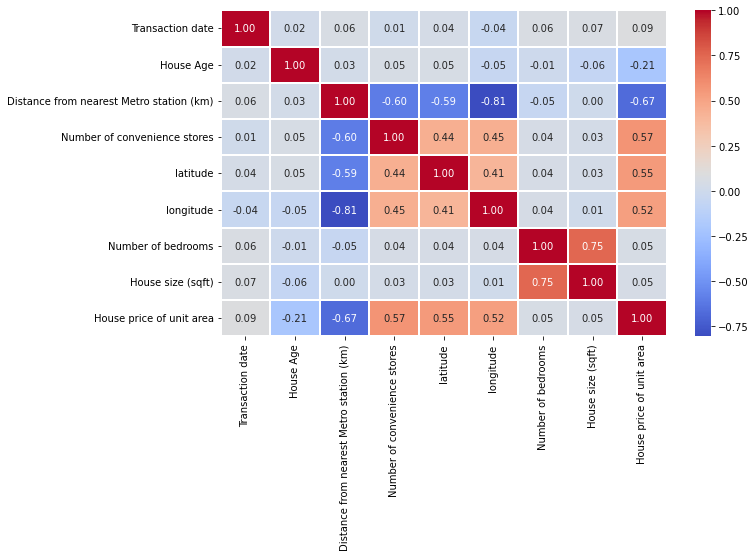

In [24]:
#generating a heatmap to check correlation between various features and the pricing
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [25]:
#transaction date has no effect on the price so dropping it
data.drop(['Transaction date'],
             axis=1,
             inplace=True)

In [26]:
data.isnull().sum() #no null values

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [27]:
data.info() #all features are either double or int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


# splitting the dataset into training and testing

In [28]:
from sklearn.model_selection import train_test_split
X = data.drop(['House price of unit area'], axis=1)
y = data['House price of unit area']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=32)

# applying various models such as Linear Regression, Random Forest and Support Vector Machine

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, y_pred))

0.17566076333837344


In [30]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, y_pred))

0.174774243169263


In [31]:
from sklearn.ensemble import RandomForestRegressor
 
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
 
mean_absolute_percentage_error(y_test, y_pred)

0.129572227167785

# Thus we can observe that a simple Linear Regression model gives the best accuracy and we don't need to explore more complex models such as Random Forest and Support Vector Machine.

# There is still scope of improvement by using cross validation and feature selection etc.